In [58]:
import pandas as pd


# Exercise 1

1. Read in all data sets and inspect their basic properties.


In [59]:
#Reading the three datasets provided for this project
athletes = pd.read_csv("athletes.csv")
games = pd.read_csv("games.csv", sep=";")
# Read all sheets into a dictionary and making the first row the header
results = pd.read_excel("results.xlsx", header= 1,sheet_name=None)




In [60]:
#Initial data inspection of the athletes csv file
athletes.head()

,athlete_id,name,gender,measurements,born,died,affiliations
0,7.0,Patrick•Chila,male,180 cm / 73 kg,1969-11-27,NaN,Espérance de Reuilly / Levallois SCTT / Royal ...
1,15.0,Damien•Éloi,male,165 cm / 58 kg,1969-07-04,NaN,"Caen TTC, Caen (FRA) / SAG Cestas, Cestas (FRA..."
2,18.0,Jean-Philippe•Gatien,male,178 cm / 73 kg,1968-10-16,NaN,"Levallois SC, Levallois-Perret (FRA)"
3,27.0,Christophe•Legoût,male,177 cm / 75 kg,1973-08-06,NaN,"Levallois SC, Levallois-Perret (FRA) / Istres ..."
4,35.0,Fabrice•Santoro,male,177 cm / 68 kg,1972-12-09,NaN,NaN


In [ ]:
# Split the measurement column to two
import re

def extract_measurement(measurement, part="height"):
    if pd.isna(measurement):
        return pd.NA
    
    try:
        # Split into height and weight parts
        parts = measurement.split('/')
        if part == "height":
            target = parts[0].strip() if len(parts) > 0 else ""
        elif part == "weight":
            target = parts[1].strip() if len(parts) > 1 else ""
        else:
            raise ValueError("part must be 'height' or 'weight'")
        
        # Check for range like "25-40 cm" or "60-70 kg"
        if '-' in target:
            numbers = [int(num) for num in re.findall(r'\d+', target)]
            if numbers:
                return sum(numbers) // len(numbers)  # average of range
            else:
                return pd.NA
        else:
            match = re.search(r'\d+', target)
            if match:
                return int(match.group(0))
            else:
                return pd.NA
    except:
        return pd.NA


In [62]:
athletes["height"] = athletes["measurements"].apply(lambda x: extract_measurement(x, part="height"))
athletes["weight"] = athletes["measurements"].apply(lambda x: extract_measurement(x, part="weight"))


In [63]:
# Finally, convert both to numeric
athletes['height'] = athletes['height'].astype('Int64')
athletes['weight'] = athletes['weight'].astype('Int64')

# Drop the original "measurements" column
athletes = athletes.drop(columns=['measurements'])

athletes.head()


,athlete_id,name,gender,born,died,affiliations,height,weight
0,7.0,Patrick•Chila,male,1969-11-27,NaN,Espérance de Reuilly / Levallois SCTT / Royal ...,180,73
1,15.0,Damien•Éloi,male,1969-07-04,NaN,"Caen TTC, Caen (FRA) / SAG Cestas, Cestas (FRA...",165,58
2,18.0,Jean-Philippe•Gatien,male,1968-10-16,NaN,"Levallois SC, Levallois-Perret (FRA)",178,73
3,27.0,Christophe•Legoût,male,1973-08-06,NaN,"Levallois SC, Levallois-Perret (FRA) / Istres ...",177,75
4,35.0,Fabrice•Santoro,male,1972-12-09,NaN,NaN,177,68


In [64]:
# Split Name column into First_Name and Last_Name
athletes[["first_name", "last_name"]] = athletes["name"].str.split("•", expand=True)

# Drop the original "Name" column
athletes = athletes.drop(columns=["name"])

athletes

,athlete_id,gender,born,died,affiliations,height,weight,first_name,last_name
0,7.0,male,1969-11-27,NaN,Espérance de Reuilly / Levallois SCTT / Royal ...,180,73,Patrick,Chila
1,15.0,male,1969-07-04,NaN,"Caen TTC, Caen (FRA) / SAG Cestas, Cestas (FRA...",165,58,Damien,Éloi
2,18.0,male,1968-10-16,NaN,"Levallois SC, Levallois-Perret (FRA)",178,73,Jean-Philippe,Gatien
3,27.0,male,1973-08-06,NaN,"Levallois SC, Levallois-Perret (FRA) / Istres ...",177,75,Christophe,Legoût
4,35.0,male,1972-12-09,NaN,NaN,177,68,Fabrice,Santoro
...,...,...,...,...,...,...,...,...,...
39370,138425.0,male,1991-08-21,NaN,"VSV, Villach (AUT)",194,85,Miha,Verlič
39371,138426.0,male,1991-05-29,NaN,"Lit CC, (SWE) / Karlstads CK, Karlstad (SWE)",177,76,Oskar,Eriksson
39372,138427.0,male,1988-06-25,NaN,"Buffalo Sabres, Buffalo (USA) / Dynamo Minsk, ...",180,75,Jhonas,Enroth
39373,138428.0,female,1996-05-04,NaN,Insight School of Colorado,165,64,Arielle,Gold


In [65]:
#Summary statistics of the athletes dataset
athletes.describe()

,athlete_id,height,weight
count,39375.000000,38997.0,38690.0
mean,101746.120406,176.217889,72.140682
std,25337.595993,11.884699,15.503804
min,7.000000,45.0,28.0
25%,93346.500000,169.0,60.0
50%,107803.000000,176.0,70.0
75%,118009.500000,184.0,81.0
max,138429.000000,226.0,214.0


In [66]:
df_list = []

# Loop through each sheet and add a "Sheet Name" column
for sheet_name, df in results.items():
    year = int(sheet_name.split()[-1])  # Extract last part (e.g., "Year 2002" → 2002)

    df["year"] = year  # Add sheet name column
    df_list.append(df)

# Combine all sheets row-wise
results_c = pd.concat(df_list, axis=0, ignore_index=True)

results_c.head()


,athlete_id,season,sport,event,position,medal,country,country_code,team,year
0,13065,winter,Bobsleigh,"Two, Women",7.0,NaN,Italy,ITA,Gerda Weissensteiner,2002
1,13139,winter,Speed Skating,"3,000 metres, Women",10.0,NaN,Canada,CAN,NaN,2002
2,13139,winter,Speed Skating,"5,000 metres, Women",3.0,Bronze,Canada,CAN,NaN,2002
3,68826,winter,Bobsleigh,"Two, Men",10.0,NaN,Great Britain,GBR,Lee Johnston,2002
4,69119,winter,Bobsleigh,"Four, Men",14.0,NaN,Great Britain,GBR,Great Britain 2,2002


In [68]:
results_c

,athlete_id,season,sport,event,position,medal,country,country_code,team,year
0,13065,winter,Bobsleigh,"Two, Women",7.0,NaN,Italy,ITA,Gerda Weissensteiner,2002
1,13139,winter,Speed Skating,"3,000 metres, Women",10.0,NaN,Canada,CAN,NaN,2002
2,13139,winter,Speed Skating,"5,000 metres, Women",3.0,Bronze,Canada,CAN,NaN,2002
3,68826,winter,Bobsleigh,"Two, Men",10.0,NaN,Great Britain,GBR,Lee Johnston,2002
4,69119,winter,Bobsleigh,"Four, Men",14.0,NaN,Great Britain,GBR,Great Britain 2,2002
...,...,...,...,...,...,...,...,...,...,...
52322,134351,summer,Football,"Football, Men",NaN,NaN,Honduras,HON,Honduras,2012
52323,134442,summer,Hockey,"Hockey, Men",NaN,NaN,India,IND,India,2012
52324,135372,summer,Hockey,"Hockey, Men",NaN,NaN,New Zealand,NZL,New Zealand,2012
52325,135926,summer,Athletics,"400 metres Hurdles, Men",NaN,NaN,Switzerland,SUI,NaN,2012


In [69]:
results_c.describe()

,athlete_id,year
count,52327.000000,52327.000000
mean,104900.739714,2007.491238
std,20489.342253,3.346573
min,7.000000,2002.000000
25%,101408.000000,2004.000000
50%,108566.000000,2008.000000
75%,116513.500000,2010.000000
max,138429.000000,2012.000000


In [70]:
#Convert the position column to integer datatype
results_c["position"] = pd.to_numeric(results_c["position"], errors="coerce").astype("Int64")

In [71]:
results_c.dtypes

athlete_id       int64
season          object
sport           object
event           object
position         Int64
medal           object
country         object
country_code    object
team            object
year             int64
dtype: object

In [72]:
games

,year,season,city,country,opened,closed
0,1912,summer,Stockholm,Sweden,1912-07-06,1912-07-27
1,1920,summer,Antwerpen,Belgium,1920-08-14,1920-08-30
2,1996,summer,Atlanta,United States,1996-07-19,1996-08-04
3,1924,summer,Paris,France,1924-07-05,1924-07-27
4,1992,summer,Barcelona,Spain,1992-07-25,1992-08-09
...,...,...,...,...,...,...
57,2022,winter,Beijing,People's Republic of China,NaN,NaN
58,2024,summer,Paris,France,NaN,NaN
59,2026,winter,Milano-Cortina d'Ampezzo,Italy,NaN,NaN
60,2028,summer,Los Angeles,United States,NaN,NaN


In [73]:
games.describe()

,year
count,62.000000
mean,1968.064516
std,36.764145
min,1896.000000
25%,1940.000000
50%,1968.000000
75%,1997.500000
max,2032.000000


# Exercise 1
2. Combine all provided data suitably into a single, tidy data set (e.g. by merging, concatenating or
reshaping the data) such that you are able to answer the subsequent questions.

In [74]:
#First merge the results and athletes data frame on the athelete_id column
""" We are merging on the left of result dataframe because we are intersted only in atheletes
whose performance data are in the olympics result sheets"""

data = pd.merge(results_c, athletes, how="left", on="athlete_id")



In [75]:
data

,athlete_id,season,sport,event,position,medal,country,country_code,team,year,gender,born,died,affiliations,height,weight,first_name,last_name
0,13065,winter,Bobsleigh,"Two, Women",7,NaN,Italy,ITA,Gerda Weissensteiner,2002,female,1968-11-07,NaN,S.C. Adriana Bolzano/BC Cortina,180,73,Antonella,Bellutti
1,13139,winter,Speed Skating,"3,000 metres, Women",10,NaN,Canada,CAN,NaN,2002,female,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...,175,72,Clara,Hughes
2,13139,winter,Speed Skating,"5,000 metres, Women",3,Bronze,Canada,CAN,NaN,2002,female,1972-09-27,NaN,Manitoba / Saturn Racing Team / Sherbrooke Spe...,175,72,Clara,Hughes
3,68826,winter,Bobsleigh,"Two, Men",10,NaN,Great Britain,GBR,Lee Johnston,2002,male,1968-02-28,NaN,"Belgrave Harriers, Wimbledon (GBR)",182,82,Marcus,Adam
4,69119,winter,Bobsleigh,"Four, Men",14,NaN,Great Britain,GBR,Great Britain 2,2002,male,1966-04-07,NaN,"Derby & County AC, Derby (GBR)",183,88,Phil,Harries
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52322,134351,summer,Football,"Football, Men",<NA>,NaN,Honduras,HON,Honduras,2012,male,1991-08-09,NaN,"CDS Vida, La Ceiba (HON) / CD Olimpia, Tegucig...",180,86,Romell,Quioto
52323,134442,summer,Hockey,"Hockey, Men",<NA>,NaN,India,IND,India,2012,male,1992-08-17,NaN,Indian Oil Corporation [IOC] [India],170,63,Kothajit,Singh
52324,135372,summer,Hockey,"Hockey, Men",<NA>,NaN,New Zealand,NZL,New Zealand,2012,male,1989-04-22,NaN,Auckland [New Zealand],180,73,Arun,Panchia
52325,135926,summer,Athletics,"400 metres Hurdles, Men",<NA>,NaN,Switzerland,SUI,NaN,2012,male,1989-01-04,NaN,"LC Zürich, Zürich (SUI)",191,77,Kariem,Hussein


In [76]:
#Next is to combine the new datset with the games dataset on the year column
# Again we are intersted in only the olympic games contained in the result file
data1 = pd.merge(data, games, how="left", on="year")

In [77]:
data1

,athlete_id,season_x,sport,event,position,medal,country_x,country_code,team,year,...,affiliations,height,weight,first_name,last_name,season_y,city,country_y,opened,closed
0,13065,winter,Bobsleigh,"Two, Women",7,NaN,Italy,ITA,Gerda Weissensteiner,2002,...,S.C. Adriana Bolzano/BC Cortina,180,73,Antonella,Bellutti,winter,Salt Lake City,United States,2002-02-08,2002-02-24
1,13139,winter,Speed Skating,"3,000 metres, Women",10,NaN,Canada,CAN,NaN,2002,...,Manitoba / Saturn Racing Team / Sherbrooke Spe...,175,72,Clara,Hughes,winter,Salt Lake City,United States,2002-02-08,2002-02-24
2,13139,winter,Speed Skating,"5,000 metres, Women",3,Bronze,Canada,CAN,NaN,2002,...,Manitoba / Saturn Racing Team / Sherbrooke Spe...,175,72,Clara,Hughes,winter,Salt Lake City,United States,2002-02-08,2002-02-24
3,68826,winter,Bobsleigh,"Two, Men",10,NaN,Great Britain,GBR,Lee Johnston,2002,...,"Belgrave Harriers, Wimbledon (GBR)",182,82,Marcus,Adam,winter,Salt Lake City,United States,2002-02-08,2002-02-24
4,69119,winter,Bobsleigh,"Four, Men",14,NaN,Great Britain,GBR,Great Britain 2,2002,...,"Derby & County AC, Derby (GBR)",183,88,Phil,Harries,winter,Salt Lake City,United States,2002-02-08,2002-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52322,134351,summer,Football,"Football, Men",<NA>,NaN,Honduras,HON,Honduras,2012,...,"CDS Vida, La Ceiba (HON) / CD Olimpia, Tegucig...",180,86,Romell,Quioto,summer,London,Great Britain,2012-07-27,2012-08-12
52323,134442,summer,Hockey,"Hockey, Men",<NA>,NaN,India,IND,India,2012,...,Indian Oil Corporation [IOC] [India],170,63,Kothajit,Singh,summer,London,Great Britain,2012-07-27,2012-08-12
52324,135372,summer,Hockey,"Hockey, Men",<NA>,NaN,New Zealand,NZL,New Zealand,2012,...,Auckland [New Zealand],180,73,Arun,Panchia,summer,London,Great Britain,2012-07-27,2012-08-12
52325,135926,summer,Athletics,"400 metres Hurdles, Men",<NA>,NaN,Switzerland,SUI,NaN,2012,...,"LC Zürich, Zürich (SUI)",191,77,Kariem,Hussein,summer,London,Great Britain,2012-07-27,2012-08-12


In [78]:
data1.shape

(52327, 23)

In [79]:
data1.describe()

,athlete_id,position,year,height,weight
count,52327.000000,43155.0,52327.000000,51993.0,51778.0
mean,104900.739714,14.999954,2007.491238,175.566038,71.093843
std,20489.342253,15.023522,3.346573,11.639384,15.277406
min,7.000000,1.0,2002.000000,46.0,28.0
25%,101408.000000,5.0,2004.000000,168.0,60.0
50%,108566.000000,9.0,2008.000000,175.0,69.0
75%,116513.500000,19.0,2010.000000,183.0,80.0
max,138429.000000,109.0,2012.000000,226.0,214.0


In [80]:
athletes["athlete_id"].nunique() 

39375

In [81]:
results_c["athlete_id"].nunique()

29338

# Exercise 1

3. Describe and justify your data processing steps in a few sentences: How do you combine the data?
What are the main challenges? How do you deal with these challenges and why?

# Answer
1) (a.) For the atheletes file: After the initial visual inspection of the data, I splitted the measurement column into "height" and "weight", and converted them to integer datatype, in order perform numeric pandas operations on the column(such as calculating the BMI of the atheletes).

1) (b.) I also splited the name column to "first_name" and "last_name" and convertered them to string objects. This will help when answering questions like the "most common last name among athelets".

2) For the result dataset: I stored the different sheets of the excel file in a ditctionary, created an additional column to indicate the year that the results belong to, before performing a row-wise (on axis=0) concatination to combine the entire excel file into a single dataframe. Since all the columns are the same, it was perfect to perform the concatination on the axis = 0.

3) (a.) Combining the entire dataset into a single suitable dataset: 
Since the result dataset contains information about the atheletes and their performance in the olympic games, it was taken as the main dataset, and the other two dataset was be used to enrich this result dataset.

3) (b.) Since the task of this project involves answering questions about the performance and profile of the atheletes at the olympics game, the left merge was used to extract only atheletes whose information are contained in the result dataset. thereby merging the result and atheletes dataset to a single dataset.

3) (c.) Lastly, the left merge was also used to extract only the relevant olympic games.


For the challenges: some athelets id were not present in the result dataset, but since the atheletes information alone does not provide any insight about their performance in the olympic games, these id's were discarded.



# Exercise 1
4. Sort the data permanently by year, sport, event and position. Then display the first 3 rows of the
data set, and print the number of rows and columns.

In [82]:
data1.sort_values(["year","sport", "event", "position"], inplace=True)


In [83]:
data1.head(3)

,athlete_id,season_x,sport,event,position,medal,country_x,country_code,team,year,...,affiliations,height,weight,first_name,last_name,season_y,city,country_y,opened,closed
814,99335,winter,Alpine Skiing,"Combined, Men",1,Gold,Norway,NOR,NaN,2002,...,"Nordstrand IF, Nordstrand (NOR)",176,85,Kjetil André,Aamodt,winter,Salt Lake City,United States,2002-02-08,2002-02-24
989,99516,winter,Alpine Skiing,"Combined, Men",2,Silver,United States,USA,NaN,2002,...,USSA/Franconia Ski Club,188,91,Bode,Miller,winter,Salt Lake City,United States,2002-02-08,2002-02-24
3432,101751,winter,Alpine Skiing,"Combined, Men",3,Bronze,Austria,AUT,NaN,2002,...,"SV Leins, Leins, Arzl im Pitztal (AUT)",182,83,Benjamin,Raich,winter,Salt Lake City,United States,2002-02-08,2002-02-24


In [84]:
data1

,athlete_id,season_x,sport,event,position,medal,country_x,country_code,team,year,...,affiliations,height,weight,first_name,last_name,season_y,city,country_y,opened,closed
814,99335,winter,Alpine Skiing,"Combined, Men",1,Gold,Norway,NOR,NaN,2002,...,"Nordstrand IF, Nordstrand (NOR)",176,85,Kjetil André,Aamodt,winter,Salt Lake City,United States,2002-02-08,2002-02-24
989,99516,winter,Alpine Skiing,"Combined, Men",2,Silver,United States,USA,NaN,2002,...,USSA/Franconia Ski Club,188,91,Bode,Miller,winter,Salt Lake City,United States,2002-02-08,2002-02-24
3432,101751,winter,Alpine Skiing,"Combined, Men",3,Bronze,Austria,AUT,NaN,2002,...,"SV Leins, Leins, Arzl im Pitztal (AUT)",182,83,Benjamin,Raich,winter,Salt Lake City,United States,2002-02-08,2002-02-24
3434,101752,winter,Alpine Skiing,"Combined, Men",4,NaN,Austria,AUT,NaN,2002,...,"SC Petzen, Bleiburg (AUT)",176,88,Rainer,Schönfelder,winter,Salt Lake City,United States,2002-02-08,2002-02-24
536,88005,winter,Alpine Skiing,"Combined, Men",5,NaN,Norway,NOR,NaN,2002,...,"Bærum Skiklubb, Bærum (NOR)",180,88,Lasse,Kjus,winter,Salt Lake City,United States,2002-02-08,2002-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51239,126283,summer,Wrestling,"Welterweight, Greco-Roman, Men",15,NaN,Switzerland,SUI,NaN,2012,...,"Ringerstaffel Freiamt, Aristau, SUI",176,66,Pascal,Strebel,summer,London,Great Britain,2012-07-27,2012-08-12
47230,122432,summer,Wrestling,"Welterweight, Greco-Roman, Men",16,NaN,Serbia,SRB,NaN,2012,...,NaN,180,66,Aleksandar,Maksimović,summer,London,Great Britain,2012-07-27,2012-08-12
49870,124926,summer,Wrestling,"Welterweight, Greco-Roman, Men",16,NaN,Venezuela,VEN,NaN,2012,...,"U.C., Naguanagua (VEN)",165,60,Wuileixis,Rivas,summer,London,Great Britain,2012-07-27,2012-08-12
48442,123556,summer,Wrestling,"Welterweight, Greco-Roman, Men",18,NaN,Turkey,TUR,NaN,2012,...,"Aski Spor Kulübü, Ankara (TUR)",168,66,Atakan,Yüksel,summer,London,Great Britain,2012-07-27,2012-08-12


#Exercise 2
1. Which lastname is the most common among the athletes of the 2012 olympic games, and how often
does this name occur?

In [85]:
data1[data1["year"]==2012].value_counts("last_name")

last_name
López          33
Smith          33
García         29
Williams       28
González       22
               ..
Špička          1
Špotáková       1
Šterbik         1
Števková        1
Abdullayeva     1
Name: count, Length: 8787, dtype: int64

Lopez and Smith are the most common last name and they both occured 33 times.

# Exercise 2
2. Which woman won the Gold medal in the 100 meters race of the 2012 olympic games?

In [86]:
data1[(data1["medal"]== "Gold" ) & (data1["year"] == 2012) & (data1["sport"] == "Athletics")  & (data1["event"] =="100 metres, Women" )]

,athlete_id,season_x,sport,event,position,medal,country_x,country_code,team,year,...,affiliations,height,weight,first_name,last_name,season_y,city,country_y,opened,closed
42930,114740,summer,Athletics,"100 metres, Women",1,Gold,Jamaica,JAM,NaN,2012,...,"MVP Track & Field Club, Kingston (JAM)",160,57,Shelly-Ann,Fraser-Pryce,summer,London,Great Britain,2012-07-27,2012-08-12


Shelly-Ann	Fraser-Pryce	

# Exercise 2
3. Which athlete has won the largest number of gold medals (in all years covered by the dataset),
considering only athletes from the following countries: “Jamaica”, “Trinidad and Tobago”, “Barbados”, “Grenada”, “Saint Kitts and Nevis”?

In [87]:
data1[(data1["medal"]=="Gold") & (data1["country_x"].isin(["Jamaica", "Trinidad and Tobago", "Barbados", "Grenada", "Saint Kitts and Nevis"]))].value_counts(["last_name","first_name","athlete_id"])

last_name       first_name  athlete_id
Bolt            Usain       105512        5
Campbell-Brown  Veronica    87116         3
Fraser-Pryce    Shelly-Ann  114740        2
Bailey-Cole     Kemar       126065        1
Bailey          Aleen       104889        1
Armstrong       Aaron       115065        1
Blake           Yohan       120717        1
Burns           Marc        89036         1
Bledman         Keston      115511        1
Callender       Emmanuel    115566        1
Carter          Nesta       115522        1
Frater          Michael     105495        1
James           Kirani      120724        1
Lawrence        Tayna       87125         1
McDonald        Beverly     72224         1
Simpson         Sherone     104904        1
Thompson        Richard     114541        1
Walcott         Keshorn     125971        1
Walker          Melaine     114925        1
Name: count, dtype: int64




last_name  -  first_name  -  athlete_id -  Gold


Bolt     -       Usain   -    105512   -     5

# Exercise 2
4. What was the best position, worst position, median position achieved by athletes from “Mongolia”?


In [88]:
Mongolia = data1[data1["country_x"]=="Mongolia"]
print(f"This is the best position",Mongolia["position"].min())
print(f"This is the worst position", Mongolia["position"].max())
print(f"This is Median position", Mongolia["position"].median())

This is the best position 1
This is the worst position 98
This is Median position 13.0


# Exercise 3
1. Which are the 5 sports with the highest average age of gold medal winners? Provide the sport and
the average age. (Note: We define age as the number of completed years between the athlete’s
birth and the opening date of the olympic games.)

In [89]:
data1["born"] = pd.to_datetime(data1["born"], errors="coerce")
data1["opened"] = pd.to_datetime(data1["opened"], errors="coerce")
data1["age"] = (data1["opened"] - data1["born"]).dt.days // 365

In [90]:
data1["age"].value_counts()

age
23.0    4017
24.0    3883
25.0    3860
22.0    3506
26.0    3375
27.0    3253
28.0    3091
21.0    3003
29.0    2512
20.0    2428
30.0    2111
19.0    1797
31.0    1728
32.0    1493
18.0    1300
33.0    1047
34.0     839
17.0     759
35.0     673
16.0     577
36.0     497
37.0     337
38.0     288
15.0     249
39.0     239
40.0     180
41.0     135
43.0     100
42.0      98
44.0      95
45.0      72
46.0      53
48.0      50
47.0      41
49.0      38
14.0      36
52.0      27
50.0      27
51.0      14
53.0      12
54.0       8
56.0       8
13.0       7
57.0       6
55.0       6
58.0       5
61.0       4
65.0       3
12.0       2
67.0       2
60.0       2
71.0       1
Name: count, dtype: int64

In [91]:
new_df = data1[data1["medal"]== "Gold"].groupby("sport").age.mean()

In [92]:
new_df.sort_values(ascending=False).head(5)

sport
Equestrian Dressage    39.181818
Equestrian Jumping     38.200000
Equestrian Eventing    38.000000
Curling                32.736842
Cycling Road           31.600000
Name: age, dtype: float64

# Exercise 3

2. The Body-Mass-Index (BMI) is a rule-of-thumb measure to classify people into groups such as
“underweight”, “normal”, “overweight” etc. The BMI is defined as the body mass (in kilograms)
divided by the square of the body height (in metres), and is expressed in units of kg/m2. Derive
a new column bmi from the provided data. Display the 5 sports with the lowest average BMI of
male athletes.

In [93]:
data1["bmi"] = data1["weight"] / ((data1["height"] / 100) ** 2)


In [94]:
data1

,athlete_id,season_x,sport,event,position,medal,country_x,country_code,team,year,...,weight,first_name,last_name,season_y,city,country_y,opened,closed,age,bmi
814,99335,winter,Alpine Skiing,"Combined, Men",1,Gold,Norway,NOR,NaN,2002,...,85,Kjetil André,Aamodt,winter,Salt Lake City,United States,2002-02-08,2002-02-24,30.0,27.440599
989,99516,winter,Alpine Skiing,"Combined, Men",2,Silver,United States,USA,NaN,2002,...,91,Bode,Miller,winter,Salt Lake City,United States,2002-02-08,2002-02-24,24.0,25.746944
3432,101751,winter,Alpine Skiing,"Combined, Men",3,Bronze,Austria,AUT,NaN,2002,...,83,Benjamin,Raich,winter,Salt Lake City,United States,2002-02-08,2002-02-24,23.0,25.05736
3434,101752,winter,Alpine Skiing,"Combined, Men",4,NaN,Austria,AUT,NaN,2002,...,88,Rainer,Schönfelder,winter,Salt Lake City,United States,2002-02-08,2002-02-24,24.0,28.409091
536,88005,winter,Alpine Skiing,"Combined, Men",5,NaN,Norway,NOR,NaN,2002,...,88,Lasse,Kjus,winter,Salt Lake City,United States,2002-02-08,2002-02-24,31.0,27.160494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51239,126283,summer,Wrestling,"Welterweight, Greco-Roman, Men",15,NaN,Switzerland,SUI,NaN,2012,...,66,Pascal,Strebel,summer,London,Great Britain,2012-07-27,2012-08-12,23.0,21.306818
47230,122432,summer,Wrestling,"Welterweight, Greco-Roman, Men",16,NaN,Serbia,SRB,NaN,2012,...,66,Aleksandar,Maksimović,summer,London,Great Britain,2012-07-27,2012-08-12,24.0,20.37037
49870,124926,summer,Wrestling,"Welterweight, Greco-Roman, Men",16,NaN,Venezuela,VEN,NaN,2012,...,60,Wuileixis,Rivas,summer,London,Great Britain,2012-07-27,2012-08-12,21.0,22.038567
48442,123556,summer,Wrestling,"Welterweight, Greco-Roman, Men",18,NaN,Turkey,TUR,NaN,2012,...,66,Atakan,Yüksel,summer,London,Great Britain,2012-07-27,2012-08-12,26.0,23.384354


In [95]:
n2 = data1[data1["gender"]== "male"].groupby("sport").bmi.mean()

In [96]:
n2.sort_values(ascending=True).head(5)

sport
Ski Jumping              19.561845
Nordic Combined          20.933458
Triathlon                21.131652
Cycling Mountain Bike     21.47987
Boxing                    21.55709
Name: bmi, dtype: Float64

# Exercise 4
Calculate the medal table for the olympic games 2012. See the official medal table as a reference. Your
medal table should have the same structure (same column names and same sorting) as the official medal
table. Display the top 10 countries.


Hint: In team events such as Basketball, all team members of the winning team receive a gold medal,
but for the medal table it should only count as one gold medal. The same logic also applies to silver and
bronze medals. You can recognize team events by the fact that multiple athletes of a country have won
the same medal in a single competition.

In [97]:
# Step 1: Filter only rows where medals were awarded
medals = data1[(data1["medal"].isin(["Gold", "Silver", "Bronze"])) & (data1["year"] == 2012)]


In [98]:
medals

,athlete_id,season_x,sport,event,position,medal,country_x,country_code,team,year,...,weight,first_name,last_name,season_y,city,country_y,opened,closed,age,bmi
49351,124388,summer,Archery,"Individual, Men",1,Gold,Republic of Korea,KOR,NaN,2012,...,100,Oh,Jin-Hyeok,summer,London,Great Britain,2012-07-27,2012-08-12,30.0,30.189591
40377,102879,summer,Archery,"Individual, Men",2,Silver,Japan,JPN,NaN,2012,...,89,Takaharu,Furukawa,summer,London,Great Britain,2012-07-27,2012-08-12,27.0,29.396221
47080,122310,summer,Archery,"Individual, Men",3,Bronze,People's Republic of China,CHN,NaN,2012,...,70,Dai,Xiaoxiang,summer,London,Great Britain,2012-07-27,2012-08-12,21.0,22.09317
49357,124392,summer,Archery,"Individual, Women",1,Gold,Republic of Korea,KOR,NaN,2012,...,57,Gi,Bo-Bae,summer,London,Great Britain,2012-07-27,2012-08-12,24.0,20.438166
41727,111484,summer,Archery,"Individual, Women",2,Silver,Mexico,MEX,NaN,2012,...,64,Aída,Román,summer,London,Great Britain,2012-07-27,2012-08-12,24.0,22.408179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51910,126869,summer,Wrestling,"Welterweight, Freestyle, Men",3,Bronze,Kazakhstan,KAZ,NaN,2012,...,66,Akzhurek,Tanatarov,summer,London,Great Britain,2012-07-27,2012-08-12,25.0,22.83737
50045,125097,summer,Wrestling,"Welterweight, Greco-Roman, Men",1,Gold,Republic of Korea,KOR,NaN,2012,...,80,Kim,Hyeon-U,summer,London,Great Britain,2012-07-27,2012-08-12,23.0,26.729927
44026,117165,summer,Wrestling,"Welterweight, Greco-Roman, Men",2,Silver,Hungary,HUN,NaN,2012,...,75,Tamás,Lőrincz,summer,London,Great Britain,2012-07-27,2012-08-12,25.0,25.351541
44024,117161,summer,Wrestling,"Welterweight, Greco-Roman, Men",3,Bronze,France,FRA,NaN,2012,...,66,Steeve,Guénot,summer,London,Great Britain,2012-07-27,2012-08-12,26.0,22.309356


In [99]:
# Step 2: Drop duplicates based on team-level identifiers  (country, event, year, and medal)
team_medals = medals.drop_duplicates(subset=["country_x", "year", "event", "medal"])



In [100]:
team_medals

,athlete_id,season_x,sport,event,position,medal,country_x,country_code,team,year,...,weight,first_name,last_name,season_y,city,country_y,opened,closed,age,bmi
49351,124388,summer,Archery,"Individual, Men",1,Gold,Republic of Korea,KOR,NaN,2012,...,100,Oh,Jin-Hyeok,summer,London,Great Britain,2012-07-27,2012-08-12,30.0,30.189591
40377,102879,summer,Archery,"Individual, Men",2,Silver,Japan,JPN,NaN,2012,...,89,Takaharu,Furukawa,summer,London,Great Britain,2012-07-27,2012-08-12,27.0,29.396221
47080,122310,summer,Archery,"Individual, Men",3,Bronze,People's Republic of China,CHN,NaN,2012,...,70,Dai,Xiaoxiang,summer,London,Great Britain,2012-07-27,2012-08-12,21.0,22.09317
49357,124392,summer,Archery,"Individual, Women",1,Gold,Republic of Korea,KOR,NaN,2012,...,57,Gi,Bo-Bae,summer,London,Great Britain,2012-07-27,2012-08-12,24.0,20.438166
41727,111484,summer,Archery,"Individual, Women",2,Silver,Mexico,MEX,NaN,2012,...,64,Aída,Román,summer,London,Great Britain,2012-07-27,2012-08-12,24.0,22.408179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51910,126869,summer,Wrestling,"Welterweight, Freestyle, Men",3,Bronze,Kazakhstan,KAZ,NaN,2012,...,66,Akzhurek,Tanatarov,summer,London,Great Britain,2012-07-27,2012-08-12,25.0,22.83737
50045,125097,summer,Wrestling,"Welterweight, Greco-Roman, Men",1,Gold,Republic of Korea,KOR,NaN,2012,...,80,Kim,Hyeon-U,summer,London,Great Britain,2012-07-27,2012-08-12,23.0,26.729927
44026,117165,summer,Wrestling,"Welterweight, Greco-Roman, Men",2,Silver,Hungary,HUN,NaN,2012,...,75,Tamás,Lőrincz,summer,London,Great Britain,2012-07-27,2012-08-12,25.0,25.351541
44024,117161,summer,Wrestling,"Welterweight, Greco-Roman, Men",3,Bronze,France,FRA,NaN,2012,...,66,Steeve,Guénot,summer,London,Great Britain,2012-07-27,2012-08-12,26.0,22.309356


In [101]:
# Step 3: Group by country and medal to get a proper medal table
medal_table = (
    team_medals.groupby("country_x")["medal"]
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)


In [102]:
medal_table

medal,country_x,Bronze,Gold,Silver
0,Afghanistan,1,0,0
1,Algeria,0,1,0
2,Argentina,2,1,1
3,Armenia,1,0,1
4,Australia,12,8,15
...,...,...,...,...
80,Ukraine,10,5,4
81,United States,30,46,28
82,Uzbekistan,3,0,0
83,Venezuela,0,1,0


In [103]:
medal_table.columns

Index(['country_x', 'Bronze', 'Gold', 'Silver'], dtype='object', name='medal')

In [104]:
# Add a total column and sort by Gold > Silver > Bronze
medal_table["Total"] = medal_table.get("Gold", 0) + medal_table.get("Silver", 0) + medal_table.get("Bronze", 0)


In [105]:
medal_table = medal_table.sort_values(by=["Gold", "Silver", "Bronze"], ascending=False)


In [106]:
medal_table

medal,country_x,Bronze,Gold,Silver,Total
81,United States,30,46,28,104
57,People's Republic of China,21,35,29,85
31,Great Britain,19,28,17,64
64,Russian Federation,25,20,20,65
62,Republic of Korea,8,13,9,30
...,...,...,...,...,...
46,Kingdom of Saudi Arabia,1,0,0,1
47,Kuwait,1,0,0,1
54,Morocco,1,0,0,1
73,Tajikistan,1,0,0,1


In [107]:
medal_table = medal_table[[ "country_x","Gold", "Silver", "Bronze", "Total"]]

In [108]:
medal_table = medal_table.rename(columns={"country_x":"country","medal":"rank"})


In [109]:
medal_table


medal,country,Gold,Silver,Bronze,Total
81,United States,46,28,30,104
57,People's Republic of China,35,29,21,85
31,Great Britain,28,17,19,64
64,Russian Federation,20,20,25,65
62,Republic of Korea,13,9,8,30
...,...,...,...,...,...
46,Kingdom of Saudi Arabia,0,0,1,1
47,Kuwait,0,0,1,1
54,Morocco,0,0,1,1
73,Tajikistan,0,0,1,1


In [110]:
medal_table
# Assign rank numbers starting from 1
medal_table["Rank"] = range(1, len(medal_table) + 1)


In [111]:
medal_table

medal,country,Gold,Silver,Bronze,Total,Rank
81,United States,46,28,30,104,1
57,People's Republic of China,35,29,21,85,2
31,Great Britain,28,17,19,64,3
64,Russian Federation,20,20,25,65,4
62,Republic of Korea,13,9,8,30,5
...,...,...,...,...,...,...
46,Kingdom of Saudi Arabia,0,0,1,1,81
47,Kuwait,0,0,1,1,82
54,Morocco,0,0,1,1,83
73,Tajikistan,0,0,1,1,84


In [112]:
medal_table.columns.name = None


In [113]:
medal_table = medal_table.set_index("Rank")


In [114]:
medal_table

,country,Gold,Silver,Bronze,Total
Rank,,,,,
1,United States,46,28,30,104
2,People's Republic of China,35,29,21,85
3,Great Britain,28,17,19,64
4,Russian Federation,20,20,25,65
5,Republic of Korea,13,9,8,30
...,...,...,...,...,...
81,Kingdom of Saudi Arabia,0,0,1,1
82,Kuwait,0,0,1,1
83,Morocco,0,0,1,1


# Exercise 5
1. Identify an interesting pattern, trend, or relationship in the data. This could relate to countries,
sports, gender, time periods, medal counts, or any other aspect. Create a single visualization that
clearly and effectively communicates the insight you found. You are free to choose the type of
chart, but make sure it suits the message you want to convey.

In [115]:
gold_medals = data1[data1['medal'] == 'Gold']


In [116]:
gold_by_country_year = gold_medals.groupby(['year', 'country_code']).size().reset_index(name='gold_count')


In [117]:
# Total golds per country
top_countries = gold_by_country_year.groupby('country_code')['gold_count'].sum().sort_values(ascending=False).head(5).index

# Filter only these top countries
gold_top = gold_by_country_year[gold_by_country_year['country_code'].isin(top_countries)]


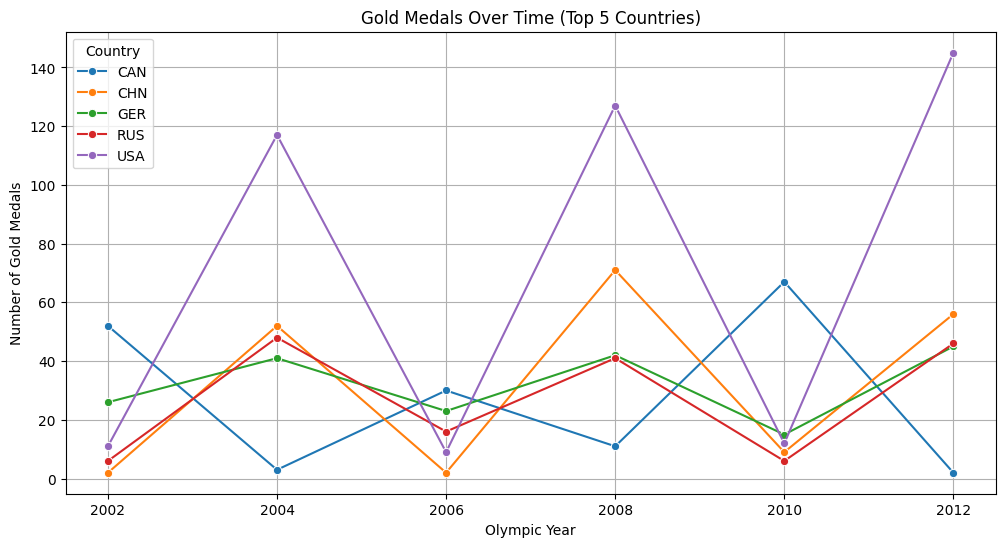

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

sns.lineplot(data=gold_top, x='year', y='gold_count', hue='country_code', marker='o')

plt.title('Gold Medals Over Time (Top 5 Countries)')
plt.xlabel('Olympic Year')
plt.ylabel('Number of Gold Medals')
plt.legend(title='Country')
plt.grid(True)
plt.show()


**Description of the Visualization:**

The line plot shows the number of gold medals won by the top 5 countries (USA, China, Germany, Russia, and Canada) at each Olympic Games from 2002 to 2012. Each country’s gold medal count is tracked over time, allowing us to compare their performance across different years.

**Interesting Pattern:**

- The **United States (USA)** consistently dominates, with especially high spikes in 2004, 2008, and 2012.
- **China** shows a **sharp increase in gold medals in 2008**, which is surprising but makes sense because China hosted the 2008 Olympics (Beijing).
- **Canada** had an unusual peak in 2010, when they hosted the Winter Olympics in Vancouver — another example of the "home advantage" effect.
- **Russia** and **Germany** show relatively stable performances without dramatic peaks or drops.

**Why It's Interesting:**
- Hosting the Olympics clearly correlates with a **huge boost** in gold medals (China 2008, Canada 2010).
- The USA’s **sustained dominance** over multiple years highlights the strength of their Olympic program, not just one-off success.
- It suggests that **external factors like hosting** can strongly influence a country's performance.
